# Autproductie

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

file_path = '../Data/Input/cars.csv'

all_cars = pd.read_csv(file_path)

#Volvo's filteren
cars = all_cars[all_cars['manufacturer'] == 'Volvo']

In [2]:
cars.sample(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
752154,Volvo,XC90 Recharge Plug-In Hybrid T8 Inscription Ex...,2021,31526.0,2.0L I4 16V GDI DOHC Hybrid,8-Speed Automatic,All-wheel Drive,Hybrid,NaN,Onyx Black Metallic,Charcoal,0.0,1.0,1.0,Medina Auto Mall,4.5,3.8,14.0,1560.0,52435.0
757496,Volvo,XC60 B5 Plus Dark Theme,2023,7745.0,2.0L I4 16V GDI DOHC Turbo,Automatic,All-wheel Drive,Gasoline,NaN,Crystal White Metallic,Blond,0.0,1.0,0.0,Bobby Rahal Volvo Cars,NaN,5.0,3.0,NaN,52977.0
757238,Volvo,XC60 3.2,2012,138612.0,3.2L I6 24V MPFI DOHC,6-Speed Automatic,All-wheel Drive,Gasoline,18-24,Black Stone,Sandstone Beige,0.0,0.0,1.0,Smart Buy Auto Sales,2.6,4.7,34.0,NaN,14495.0
759863,Volvo,V90 Cross Country T6,2020,26908.0,I-4 cyl,Automatic with Geartronic,All-wheel Drive,Gasoline,NaN,Crystal White Pearl Metallic,Blond,1.0,1.0,0.0,Volvo Cars Walnut Creek,NaN,5.0,2.0,100.0,47781.0
753376,Volvo,XC90 T5 Momentum 7 Passenger,2020,24652.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Front-wheel Drive,Gasoline,21-30,NaN,NaN,0.0,1.0,1.0,Jaguar Land Rover Porsche Volvo Cars of Greenv...,3.7,4.7,36.0,1196.0,42799.0


In [3]:
print(cars.isna().sum())

manufacturer              0
model                     0
year                      0
mileage                   3
engine                   46
transmission             63
drivetrain              226
fuel_type                17
mpg                    2306
exterior_color          183
interior_color         1259
accidents_or_damage     617
one_owner               703
personal_use_only       620
seller_name             102
seller_rating          2685
driver_rating           561
driver_reviews_num        0
price_drop             4303
price                     0
dtype: int64


In [4]:
cars.shape

(10029, 20)

### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

**year** is categorisch, ordinaal. Want niet zinvol om op te tellen maar er zit wel een rangschikking in.
**Fuel_type** is categorisch, niet-ordinaal. 
**seller_rating** is categorisch, ordinaal.

In [5]:
columns_to_check = ['year', 'fuel_type', 'seller_rating']

types_of_columns = cars[columns_to_check].dtypes

print(types_of_columns)

year               int64
fuel_type         object
seller_rating    float64
dtype: object


### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

Hiervoor moet de **mediaan** worden berekend. De mediaan wordt namelijk minder beïnvloed door outliers en extreme waarden dan het gemiddelde. De auto met de mediaan als prijs, is de 'gewoonlijke' tweedehands Volvo.

In [6]:
median_price = cars['price'].median()
car_with_median_price = cars[cars['price'] == median_price]

print(f"Mediaan prijs tweedehands Volvo: {median_price}")
print(f"Voorbeeld van de gewoonlijke tweedehands Volvo:") 
car_with_median_price 

Mediaan prijs tweedehands Volvo: 36673.0
Voorbeeld van de gewoonlijke tweedehands Volvo:


,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
755471,Volvo,XC40 R-Design,2020,35989.0,I-4 cyl,Automatic with Geartronic,AWD,Gasoline,NaN,Onyx Black Metallic,Charcoal,0.0,1.0,1.0,Borton Volvo Cars,4.0,4.9,50.0,NaN,36673.0


### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

Mediaan en gemiddelde liggen ongeveer in het **midden** omdat het een **normaalverdeling** is.

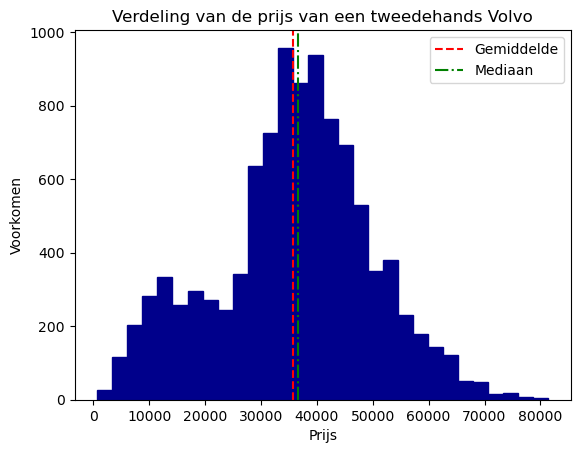

In [7]:
mean_price = cars['price'].mean()

plt.hist(cars['price'], bins=30, color='darkblue', edgecolor='darkblue')
plt.axvline
plt.xlabel('Prijs')
plt.ylabel('Voorkomen')
plt.title('Verdeling van de prijs van een tweedehands Volvo')
plt.axvline(mean_price, color='red', linestyle='--', label='Gemiddelde')
plt.axvline(median_price, color='green', linestyle='-.', label='Mediaan')
plt.legend()

plt.show()

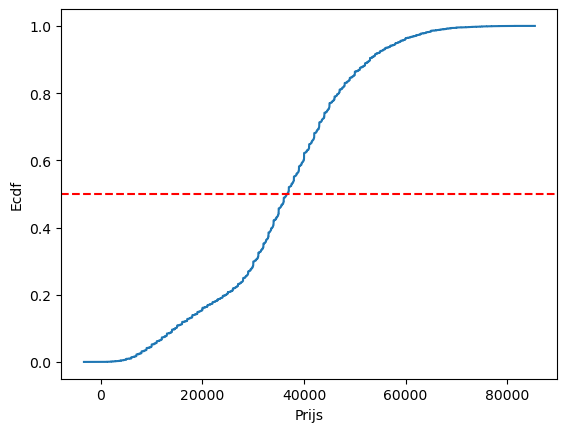

In [8]:
res = stats.ecdf(cars['price'])
res.cdf.quantiles
res.cdf.probabilities
ax = plt.subplot()
res.cdf.plot(ax)
ax.set_xlabel('Prijs')
ax.set_ylabel('Ecdf')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

In [9]:
# Alleen ELectric, Gasoline en Hybrid, zoals in de opgave
desired_fuel_types = ['Electric', 'Gasoline', 'Hybrid']
fuel_type_prices = cars[cars['fuel_type'].isin(desired_fuel_types)][['fuel_type', 'price']]

# Compute frequency counts for each price for each fuel type
electric_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Electric']['price'].value_counts()
gasoline_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Gasoline']['price'].value_counts()
hybrid_counts = fuel_type_prices[fuel_type_prices['fuel_type'] =='Hybrid']['price'].value_counts()

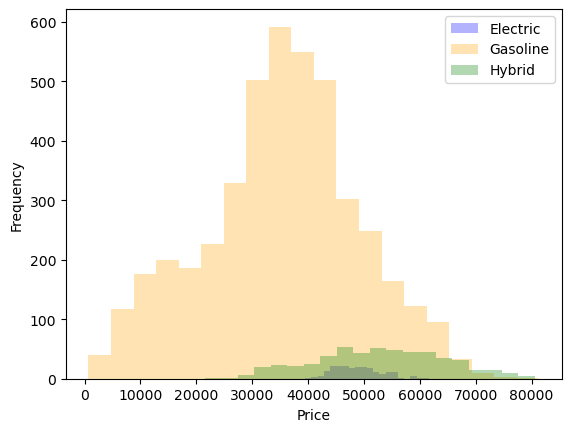

In [10]:
plt.hist(electric_counts.index, bins=20, alpha=0.3, color='blue')
plt.hist(gasoline_counts.index, bins=20, alpha=0.3, color='orange')
plt.hist(hybrid_counts.index, bins=20, alpha=0.3, color='green')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(['Electric', 'Gasoline', 'Hybrid'])
plt.show()

Door er een **density** histogram van te maken, weegt het grote aantal van gasoline niet door en kunnen we de prijsdistributies van beide soorten auto's vergelijken op basis van hun verhoudingen, niet alleen op basis van absolute aantallen.

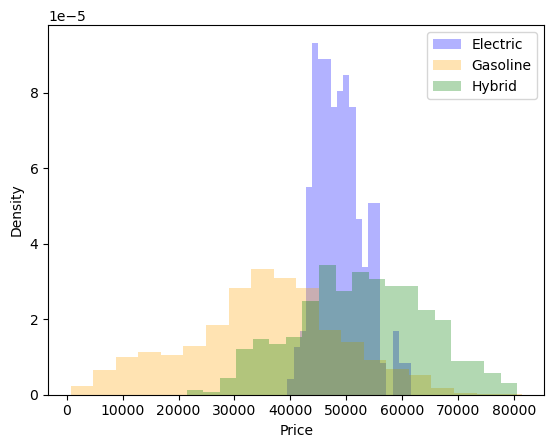

In [11]:
plt.hist(electric_counts.index, bins=20, alpha=0.3, color='blue', density=True)
plt.hist(gasoline_counts.index, bins=20, alpha=0.3, color='orange', density=True)
plt.hist(hybrid_counts.index, bins=20, alpha=0.3, color='green', density=True)

plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(['Electric', 'Gasoline', 'Hybrid'])
plt.show()

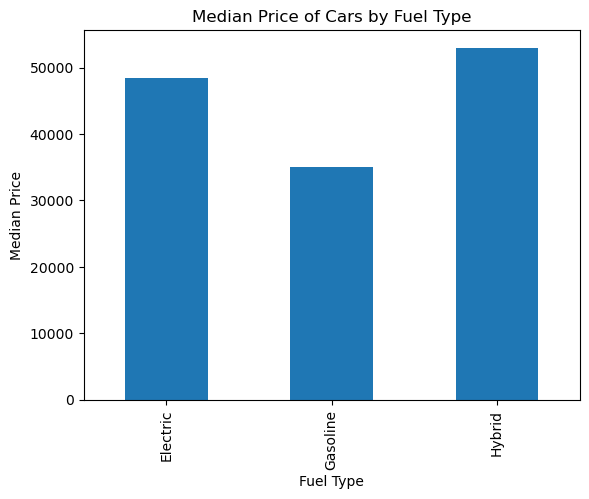

In [12]:
# Calculate median price of each fuel type
median_prices = fuel_type_prices.groupby('fuel_type')['price'].median()

# Plot the medians
median_prices.plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Median Price')
plt.title('Median Price of Cars by Fuel Type')
plt.show()


### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

**Fout**, de spreiding op de prijs van elektrische wagens is kleiner dan die van benzinewagens. De box en whiskers zijn namelijk korter dus is de spreidingsbreedte kleiner.

Het is **niet mogelijk** om te besluiten of wagen die meer dan 50 000 euro kost een grotere kans om elektrisch te zijn dan benzine. De boxplots zeggen iets over het minimum, het eerste kwartiel, de mediaan, het derde kwartiel en het maximum van een bepaalde populatie (Electric en Gasoline). We weten niet hoeveel auto's er in totaal in de verschillende populaties zitten dus weten we niet of de kans groter is dat de wagen elektrisch of benzine zou zijn.

**Juist**, een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen. Het derde kwartiel ligt op 50 000 dus 25% ligt boven de 50 000 euro. Bij benzine ligt het derde kwartiel lager dus is er minder dan 25% boven de 50 000 euro. 


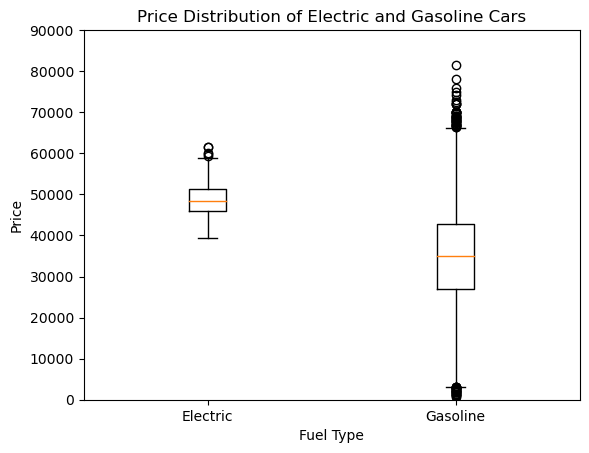

In [13]:
price_electric = cars.groupby('fuel_type').get_group('Electric')['price']
price_gasoline = cars.groupby('fuel_type').get_group('Gasoline')['price']

# Combine data into a list of lists
combined_data = [price_electric.tolist(), price_gasoline.tolist()]

# Create a box plot without outliers
plt.boxplot(combined_data, labels=['Electric', 'Gasoline'], showfliers=True) 

plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution of Electric and Gasoline Cars')
plt.ylim(0, 90000)

# Show the plot
plt.show()


### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

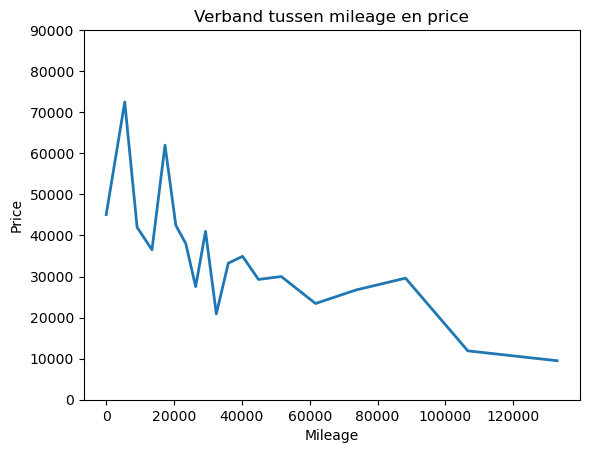

In [14]:
# Mediaan per mileage
mean_prices = cars.groupby('mileage')['price'].mean()

# Downsample om duidelijkere visualisatie te krijgen
downsampled_mean_prices = mean_prices.iloc[::500]
plt.plot(downsampled_mean_prices.index, downsampled_mean_prices.values, linestyle='-', linewidth=2)

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Verband tussen mileage en price')
plt.ylim(0, 90000)
plt.show()


### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

Dit kan worden nagegaan door het **confidence interval** te berekenen. Dit kan via bootstrapping of via de centrale limietstelling. 

In [48]:
#CI op basis van CLS
electric_cars = fuel_type_prices[fuel_type_prices['fuel_type'] =='Electric']['price']
mean_price_electric = electric_cars.mean()

sample_size = len(electric_cars)
std_dev = np.std(electric_cars)
confidence_level = 0.95
standaardfout = std_dev / (math.sqrt(sample_size))

benedengrens = mean_price_electric - standaardfout
bovengrens = mean_price_electric + standaardfout

print(f"Gemiddelde prijs elektrische Volvo: {mean_price_electric}")
print(f"Betrouwbaarheidsinterval: €{benedengrens:.2f} tot €{bovengrens:.2f}")

Gemiddelde prijs elektrische Volvo: 48788.391304347824
Betrouwbaarheidsinterval: €48527.24 tot €49049.54


Bootstrapped betrouwbaarheidsinterval: €48285.59 tot €49311.61


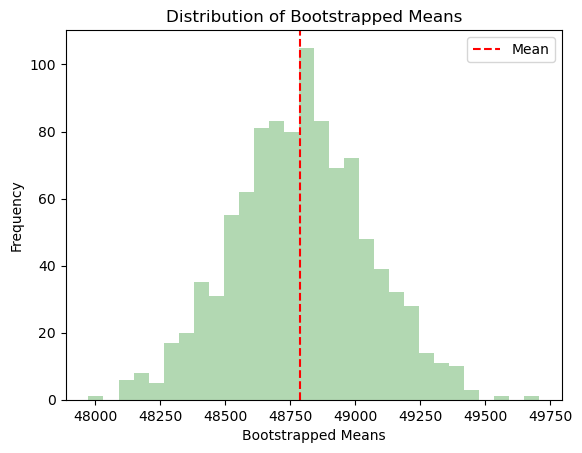

In [51]:
#CI op basis van bootstrapping

def bootstrap_mean(data, num_resamples):
    resampled_means = []
    for _ in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)
        resampled_mean = np.mean(resample)
        resampled_means.append(resampled_mean)
    return resampled_means

num_resamples = 1000
resampled_means = bootstrap_mean(electric_cars, num_resamples)

confidence_level = 0.95
alpha = (1 - confidence_level) / 2
lower_percentile = alpha * 100
upper_percentile = (1 - alpha) * 100
lower_bound = np.percentile(resampled_means, lower_percentile)
upper_bound = np.percentile(resampled_means, upper_percentile)

print(f"Bootstrapped betrouwbaarheidsinterval: €{lower_bound:.2f} tot €{upper_bound:.2f}")

# Plot histogram
plt.hist(resampled_means, bins=30, color='green', alpha=0.3)
plt.axvline(x=mean_price_electric, color='red', linestyle='--', label='Mean')

plt.xlabel('Bootstrapped Means')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrapped Means')
plt.legend()

plt.show()